# Epidemiology Model (SIRS Model) 
Below is coded to help myself study Math 113B (Mathematic modles in Biology) in UCI. 
I refered to my professor and TA's teaching. 

This code is to analyze one example of Non-linear systems, Epidemiology Models.
$$\frac{dS}{dt}=-\beta SI + \gamma R$$
$$\frac{dI}{dt}=\beta SI - vI $$
$$\frac{dR}{dt}=vI - \gamma R$$

Because the number of variables is three, I will not draw nullclines for SIRS model.
I will draw phase plane, find steady states & eigen values to linearize SIRS model at steady states. 

The results will be different if reproductive number is greater than 1 or not. 
(reproductive number = $\frac{N\beta}{v}$)

In [2]:
# import the relevant modules
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.integrate import odeint

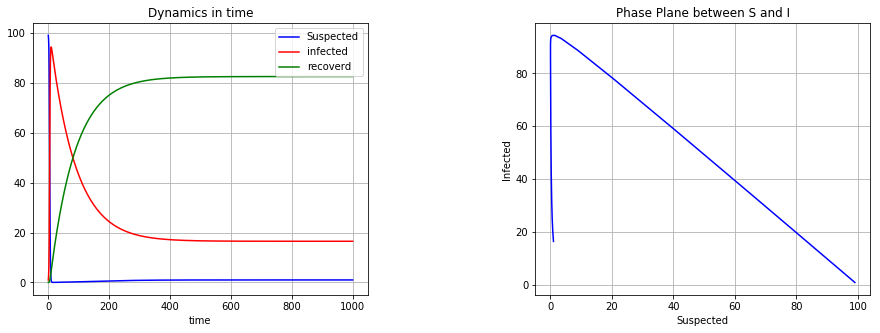

In [110]:
'''
    Case 1 reproductive number > 1
    S = 99, I= 1, R=0, beta = 0.1, v = 0.1, gamma = 1./50 = 0.02
'''
beta = 0.1
v = 0.1
gamma = 1./50
endtime = 100

# Draw Phase Plane 
def ode_system(X, t=0):
    # X[0] = S, X[1] = I, X[2] = R
    S, I, R = X
    return np.array([-beta*S*I + gamma*R, beta*S*I - v*I, v*I - gamma*R])

t = np.linspace(0, endtime, 1001)

# initial value: S=99, I=1, R=0
initial_value = np.array([99, 1, 0])

# call odeint()
Z = odeint(ode_system, initial_value, t)

s, i, r = Z.T

# Plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
sub1 = fig.add_subplot(1,2,1)
sub2 = fig.add_subplot(1,2,2)

sub1.plot(s, 'b-', label="Suspected")
sub1.plot(i, 'r-', label="infected")
sub1.plot(r, 'g-', label="recoverd")
sub1.set_title("Dynamics in time")
sub1.set_xlabel("time")
sub1.grid()
sub1.legend(loc="best")

sub2.plot(s, i, color="blue")
sub2.set_title("Phase Plane between S and I")
sub2.set_xlabel("Suspected")
sub2.set_ylabel("Infected")
sub2.grid()


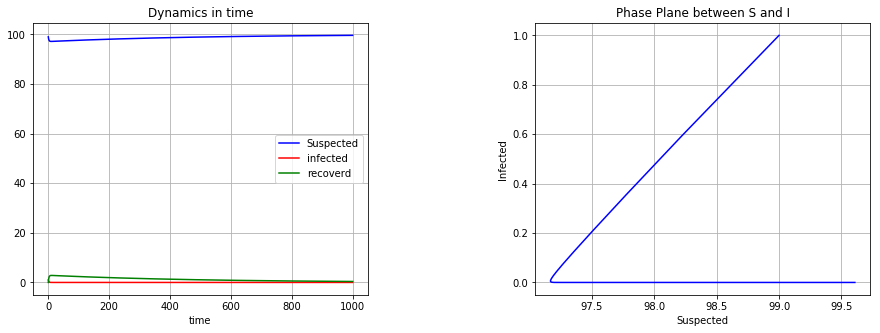

In [111]:
'''
    Case 2 reproductive number < 1
    S = 99, I= 1, R=0, beta = 0.1, v = 15, gamma = 1./50
'''
beta = 0.1
v = 15
gamma = 1./50
endtime = 100

# Draw Phase Plane 
def ode_system(X, t=0):
    # X[0] = S, X[1] = I, X[2] = R
    S, I, R = X
    return np.array([-beta*S*I + gamma*R, beta*S*I - v*I, v*I - gamma*R])

t = np.linspace(0, endtime, 1001)

# initial value: S=99, I=1, R=0
initial_value = np.array([99, 1, 0])

# call odeint()
Z = odeint(ode_system, initial_value, t)

s, i, r = Z.T

# Plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
sub1 = fig.add_subplot(1,2,1)
sub2 = fig.add_subplot(1,2,2)

sub1.plot(s, 'b-', label="Suspected")
sub1.plot(i, 'r-', label="infected")
sub1.plot(r, 'g-', label="recoverd")
sub1.set_title("Dynamics in time")
sub1.set_xlabel("time")
sub1.grid()
sub1.legend(loc="best")

sub2.plot(s, i, color="blue")
sub2.set_title("Phase Plane between S and I")
sub2.set_xlabel("Suspected")
sub2.set_ylabel("Infected")
sub2.grid()



## Steady States
To find steady states, I will use sympy library.

Assume $$\beta=0.1, v=0.1, \gamma = 0.02, N=100$$

In [148]:
# Find Steady States

import sympy as sm

beta = 0.1
v = 0.1
gamma = 1./50

# Define system and this system has no negative value
x,y,z = sm.symbols('S, I, R', negative=False)
x_prime = -beta*x*y + gamma*z
y_prime = beta*x*y - v*y
z_prime = v*y - gamma*z

XEqual = sm.Eq(x_prime,0)
YEqual = sm.Eq(y_prime,0)
ZEqual = sm.Eq(z_prime,0)

steady_states = sm.solve( (XEqual, YEqual, ZEqual), x,y,z)

# Expected steady states 1: { N,0,0 }, 2:{ 1, 0.2*(N-1), 5I(=N-1) } or { 1, 0.2*R, R}
print(steady_states)





[{I: 0.0, R: 0.0}, {I: 0.2*R, S: 1.00000000000000}]


## Eigen Values
To get eigen values, We will use quadratic formula.
$$\begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{pmatrix}$$

$$ \lambda = (trace/2) \pm \sqrt{trace^2 / 4 + \delta} $$
$$trace = a_{11} + a_{22}$$
$$\Delta = a_{11} a_{22} - a_{12} a_{21} $$

But, this system has three variables. So I will use sympy library.

Assume $$\beta=0.1, v=0.1, \gamma = 0.02, N=100$$
Then first steady state is $$(100, 0, 0)$$
Second state can be gotten through $$(\frac{v}{\beta}, \frac{\gamma (N-S)}{(v + \gamma)}, \frac{v I}{\gamma}) = (1,16.5,82.5)$$

In [149]:
eq_mat = sm.Matrix([x_prime, y_prime, z_prime])
mat = sm.Matrix([x,y,z])
jacobian_mat = eq_mat.jacobian(mat)

print(f'Jacobian {jacobian_mat}')
print('----------------------------------------------------------------------------------')
      
# Assume first S.S. = (100,0,0), Second S.S = (1, 16.5, 82.5)
eq_mat = jacobian_mat.subs([ (x, 100), (y, 0), (z, 0) ])
print(f'The eigenvalues for the first steady states are {list(eq_mat.eigenvals().keys())}')
print('----------------------------------------------------------------------------------')
eq_mat = jacobian_mat.subs([ (x, 1), (y, 16.5), (z, 82.5) ])
print(f'The eigenvalues for the second steady states are {list(eq_mat.eigenvals().keys())}')
print('----------------------------------------------------------------------------------')




Jacobian Matrix([[-0.1*I, -0.1*S, 0.0200000000000000], [0.1*I, 0.1*S - 0.1, 0], [0, 0.100000000000000, -0.0200000000000000]])
----------------------------------------------------------------------------------
The eigenvalues for the first steady states are [99/10, -1/50, 0]
----------------------------------------------------------------------------------
The eigenvalues for the second steady states are [-167/200 - sqrt(19969)/200, -167/200 + sqrt(19969)/200, 0]
----------------------------------------------------------------------------------


## Result
If the reductive number is greater than 1, each steady states has 0 as one of eigenvalues. Then jacobian matrices are not Hyperbolic. We can't linearize this non-linear system.